# Central Limit Theorem (CLT)
> The Central Limit Theorem (CLT) is a cornerstone of statistics. It states that the sampling distribution of the sample mean ($ \bar{X} $) of a large number of samples drawn from any population (regardless of its own distribution) will be approximately normally distributed.
+ Key Idea: If you take sufficiently large random samples from a population and calculate the mean of each sample, the distribution of those means will look like a bell curve.
+ Significance: This allows us to use normal distribution properties to make inferences about the population mean, even if we don't know the shape of the population's distribution.
+ The mean of this sampling distribution will be equal to the population mean $ μ $, and its standard deviation (called the standard error) will be $ \frac{σ}{\sqrt{n}} $ , where $ σ $ is the population standard deviation and $ n $ is the sample size.

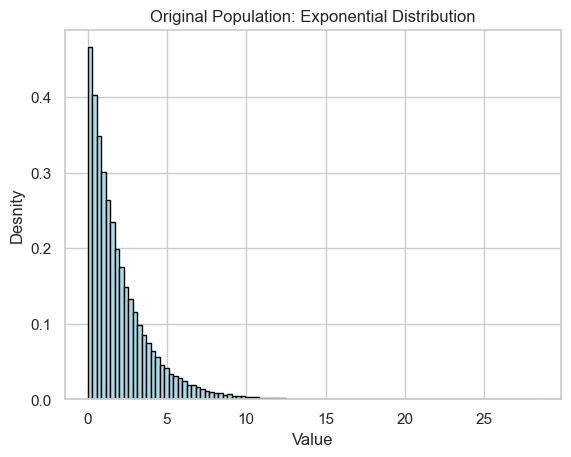

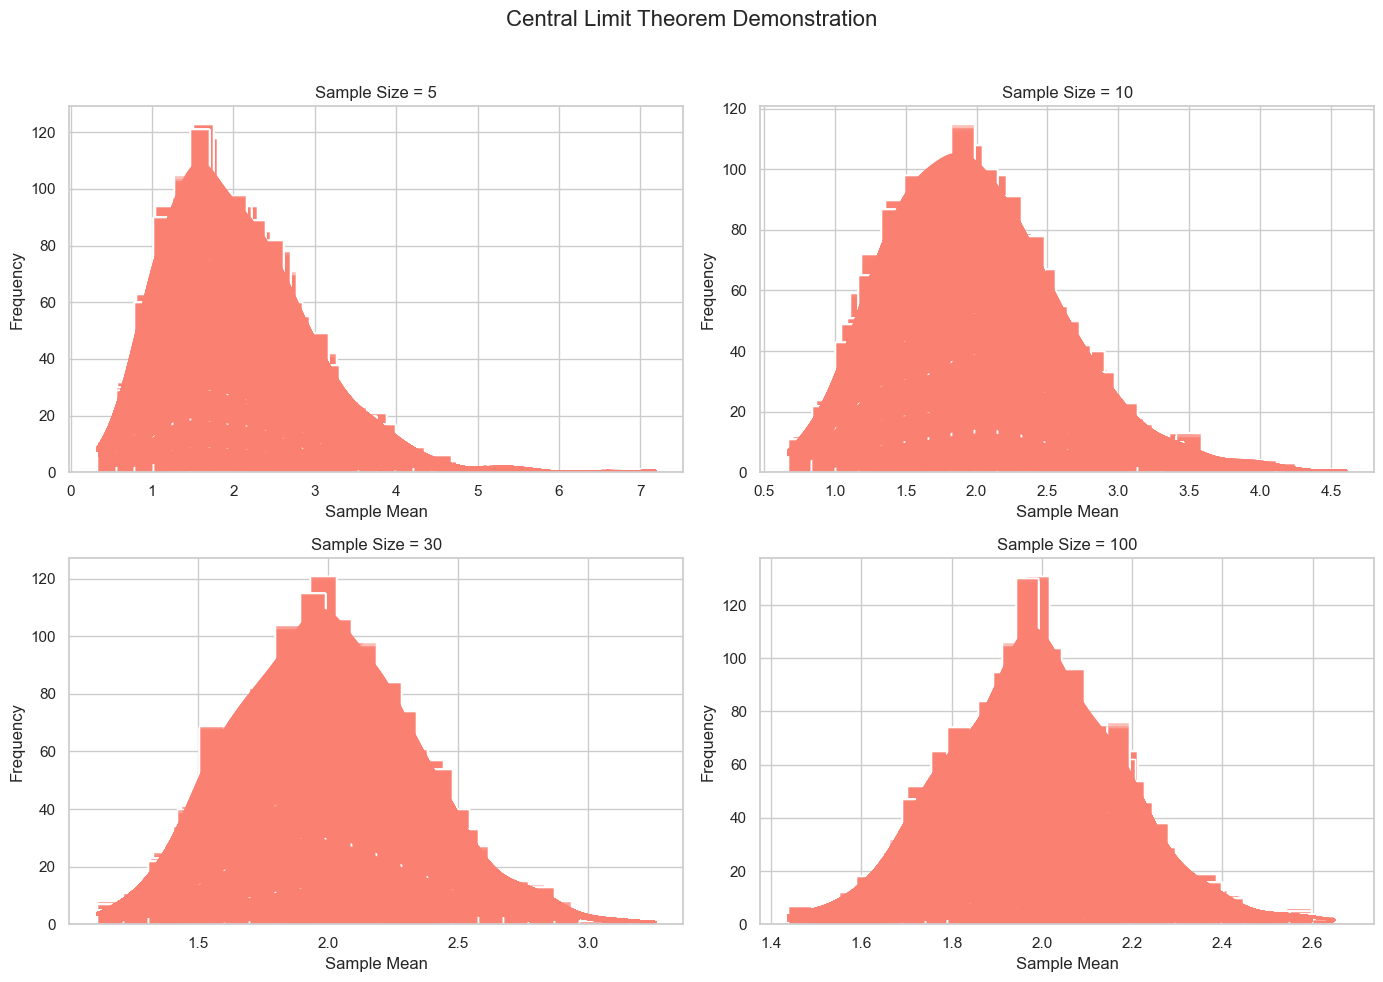

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Population: Exponential (skewed, not normal)
population = np.random.exponential(scale=2, size=100000)

# Plot Population
plt.hist(population, bins=100, density=True, color='lightblue', edgecolor='black')
plt.title("Original Population: Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Desnity")
plt.show()

# Simple CLT: Draw many sample means
sample_sizes = [5, 10, 30, 100]
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, n in enumerate(sample_sizes):
    means = []
    for _ in range(1000):
        sample = np.random.choice(population, size=n, replace=True)
        means.append(np.mean(sample))
        ax = axs[i//2, i%2]
        sns.histplot(means, kde=True, ax=ax, color='salmon')
        ax.set_title(f"Sample Size = {n}")
        ax.set_xlabel("Sample Mean")
        ax.set_ylabel("Frequency")
plt.suptitle("Central Limit Theorem Demonstration", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

- `MinMaxScaler`: Scales features to a range between 0 and 1.
- `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
- `RobustScaler`: Scales features using statistics that are robust to outliers.
- `Normalizer`: Scales individual samples to have unit norm.
- `PowerTransformer`: Applies a power transformation to make the data more Gaussian-like (using Yeo-Johnson method).
- `QuantileTransformer`: Transforms features to follow a uniform or normal distribution.

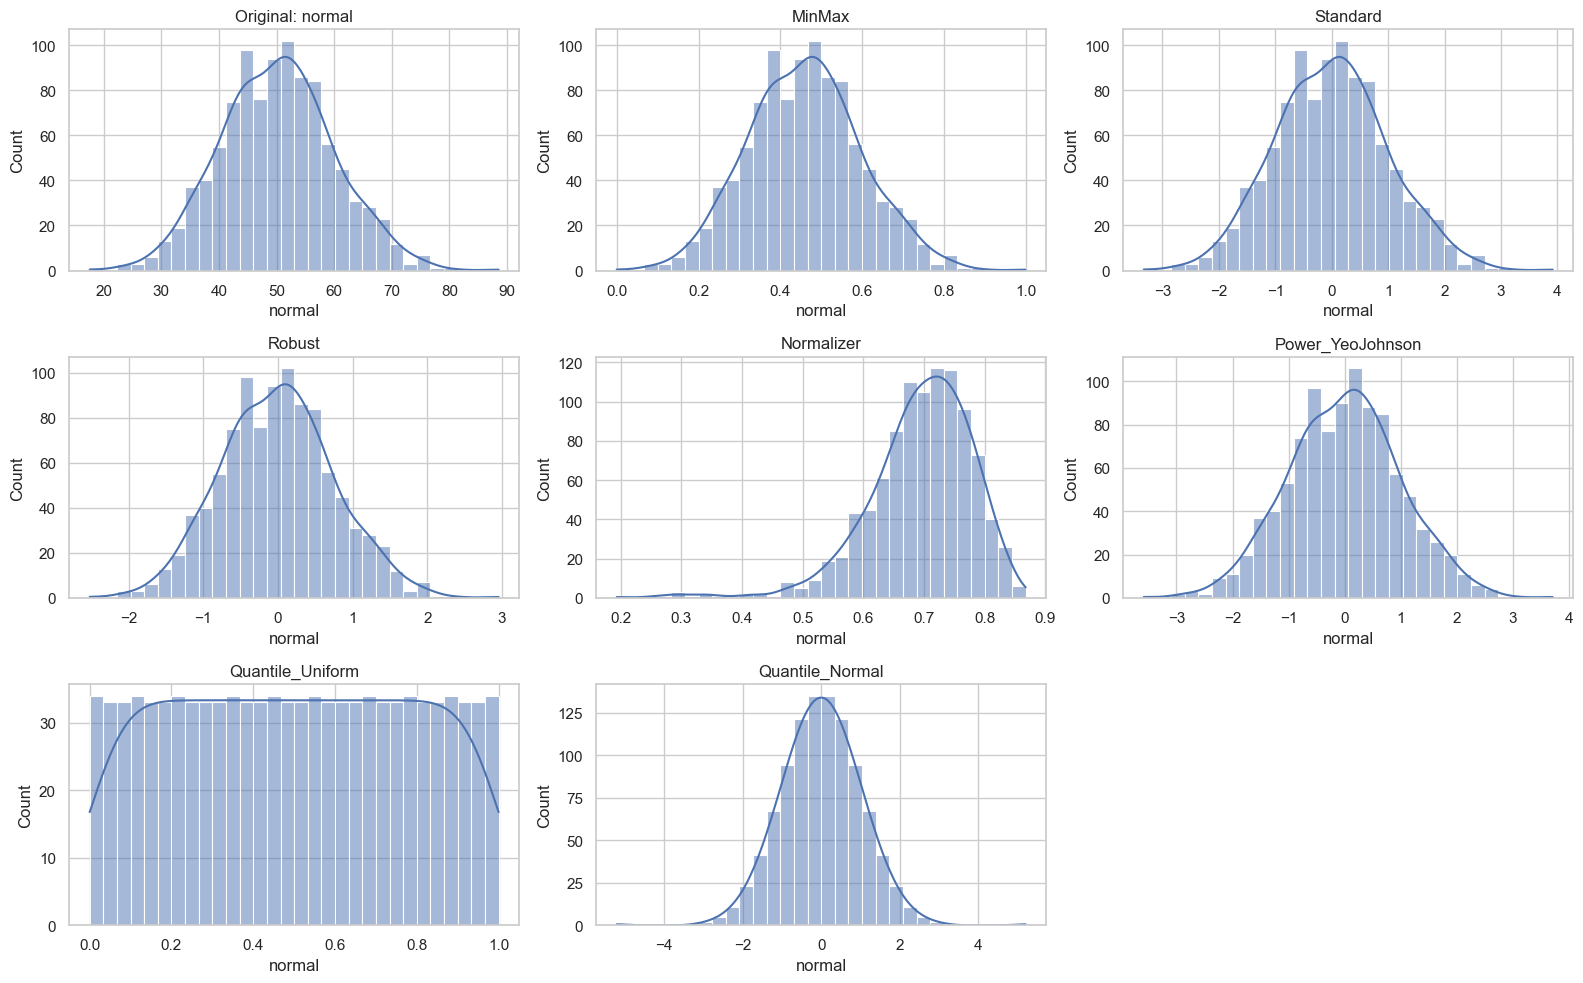

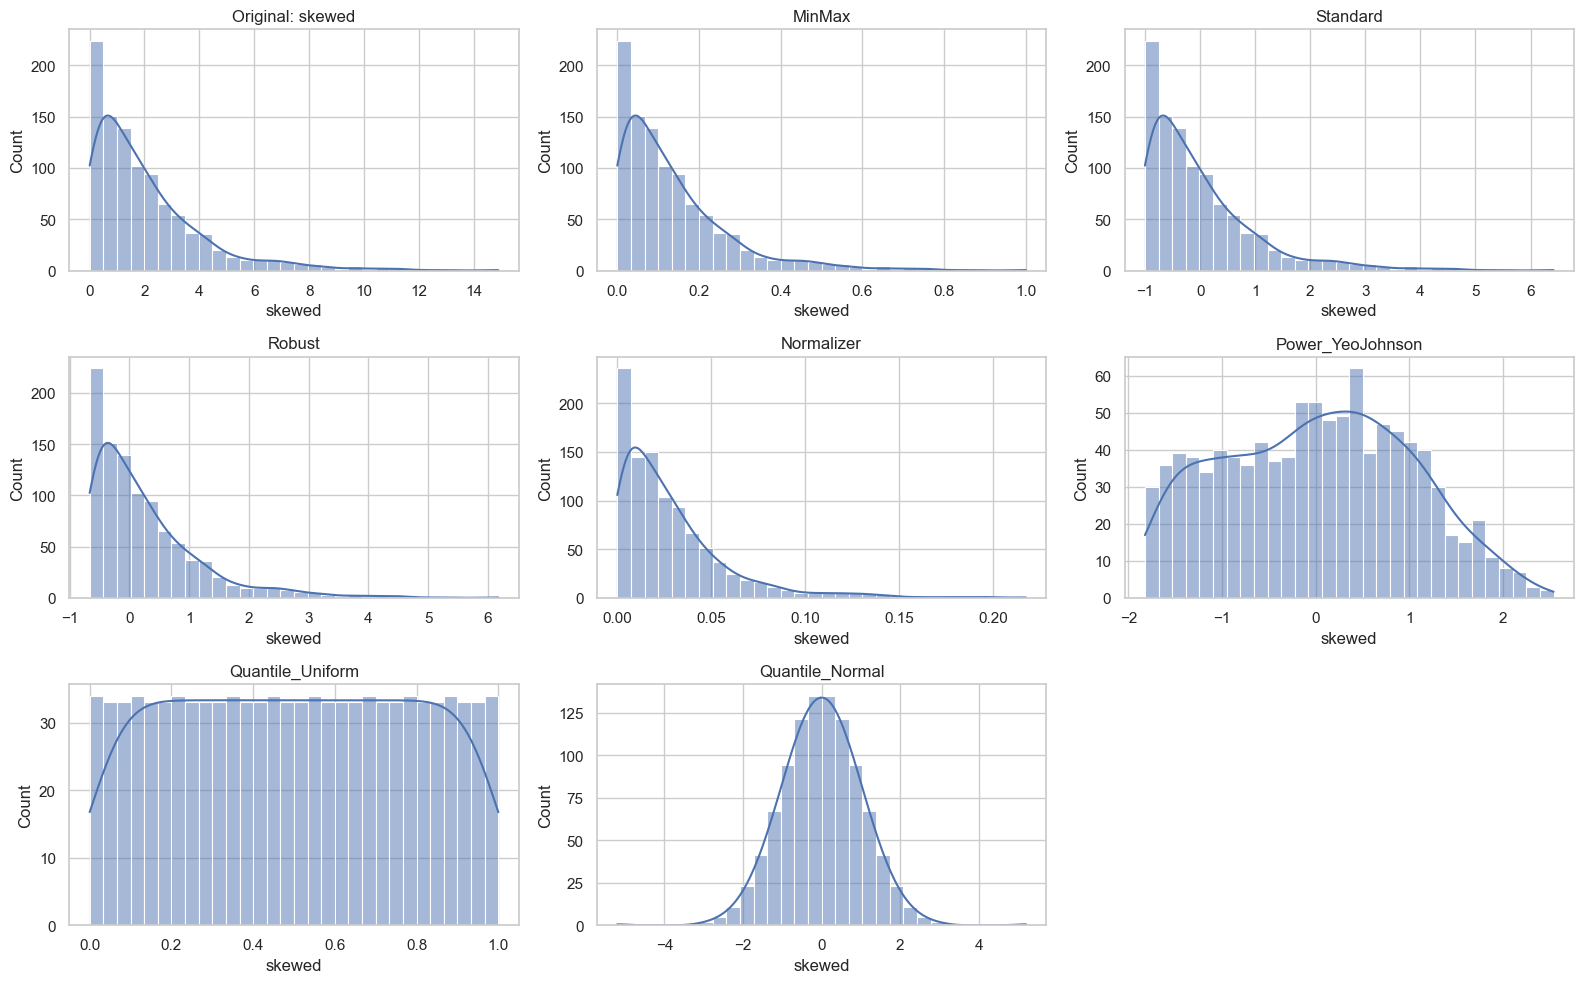

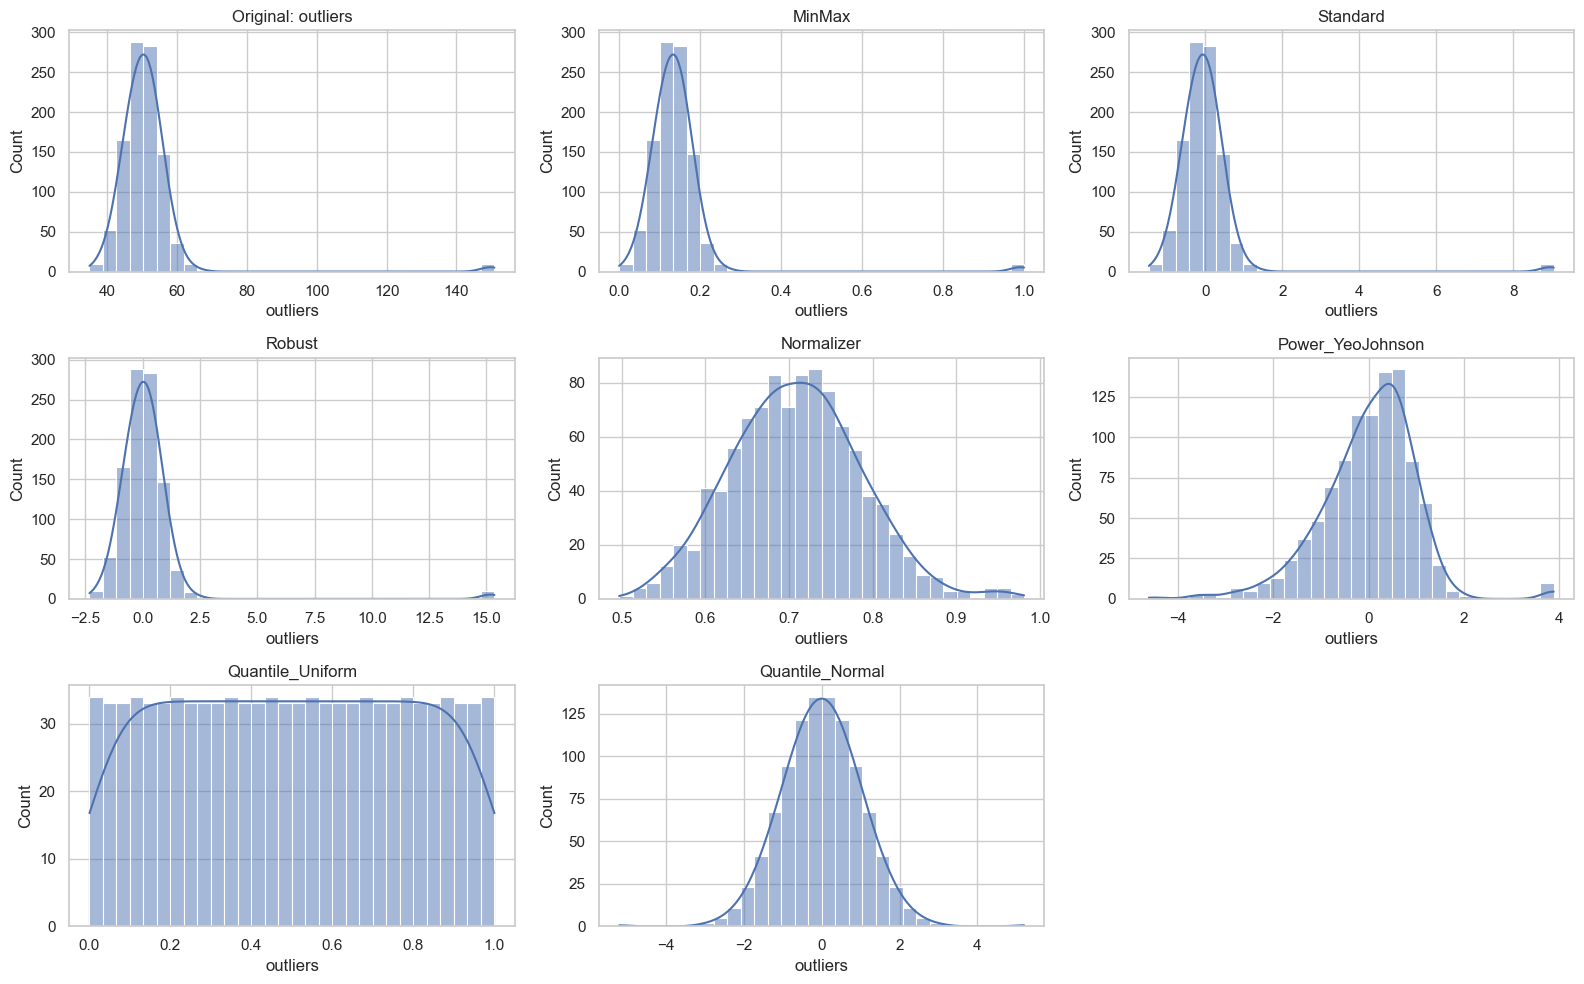

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import (MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer, QuantileTransformer)

sns.set(style='whitegrid')

np.random.seed(42)

df_created = pd.DataFrame({
    'normal': np.random.normal(loc=50, scale=10, size=1000),
    'skewed': np.random.exponential(scale=2, size=1000),
    'outliers': np.append(np.random.normal(50, 5, 990), np.random.normal(150, 1, 10))
})

scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler(),
    'Normalizer': Normalizer(),
    'Power_YeoJohnson': PowerTransformer(method='yeo-johnson'),
    'Quantile_Uniform': QuantileTransformer(output_distribution='uniform'),
    'Quantile_Normal': QuantileTransformer(output_distribution='normal')
}

scaled_data = {}
for name, scaler in scalers.items():
    try:
        scaled = scaler.fit_transform(df_created)
        scaled_data[name] = pd.DataFrame(scaled, columns=df_created.columns)
    except Exception as e:
        print(f"Error with {name}: {e}")

# Plot original and tranformed versions of each columns
for col in df_created.columns:
    plt.figure(figsize=(16, 10))
    plt.subplot(3, 3, 1)
    sns.histplot(df_created[col], kde=True, bins=30)
    plt.title(f"Original: {col}")
    for i, (name, df) in enumerate(scaled_data.items(), start=2):
        plt.subplot(3, 3, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(name)
    plt.tight_layout()
    plt.show()

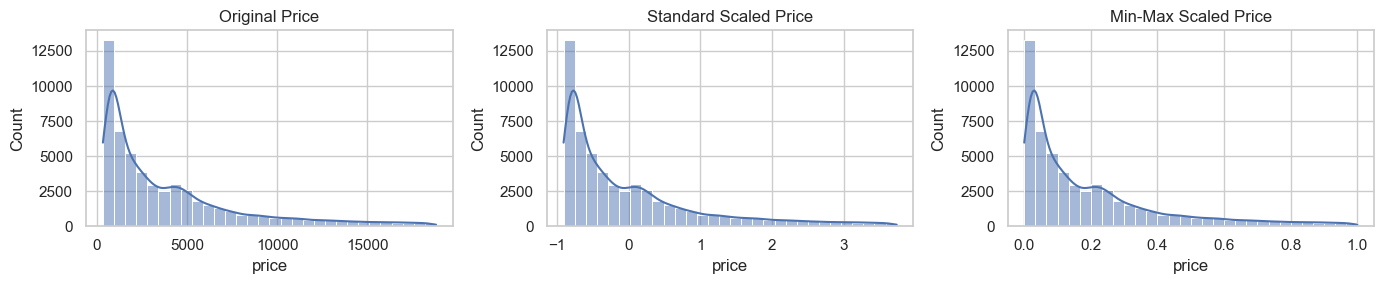

In [27]:
df_real = sns.load_dataset('diamonds')[['carat', 'depth', 'table', 'price']]
standard_scaled = pd.DataFrame(StandardScaler().fit_transform(df_real), columns=df_real.columns)
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_real), columns=df_real.columns)

plt.figure(figsize=(14, 3))

plt.subplot(1, 3, 1)
sns.histplot(df_real['price'], kde=True, bins=30)
plt.title('Original Price')

plt.subplot(1, 3, 2)
sns.histplot(standard_scaled['price'], kde=True, bins=30)
plt.title('Standard Scaled Price')

plt.subplot(1, 3, 3)
sns.histplot(minmax_scaled['price'], kde=True, bins=30)
plt.title('Min-Max Scaled Price')

plt.tight_layout()
plt.show()

---

- `squared_df`: Squares each element in the DataFrame.
- `sqrt_df`: Applies the square root transformation to each element, clipping values to be non-negative.
- `log_df`: Applies the natural logarithm transformation to each element, using np.log1p to handle zero values safely.
- `lognormal_df`: Applies the inverse of the logarithm transformation (exponential) to each element.
- `yeojohnson_df`: Applies the Yeo-Johnson transformation (which can handle zero and negative values) using PowerTransformer.
- `boxcox_df`: Applies the Box-Cox transformation using PowerTransformer, which requires the data to be positive.

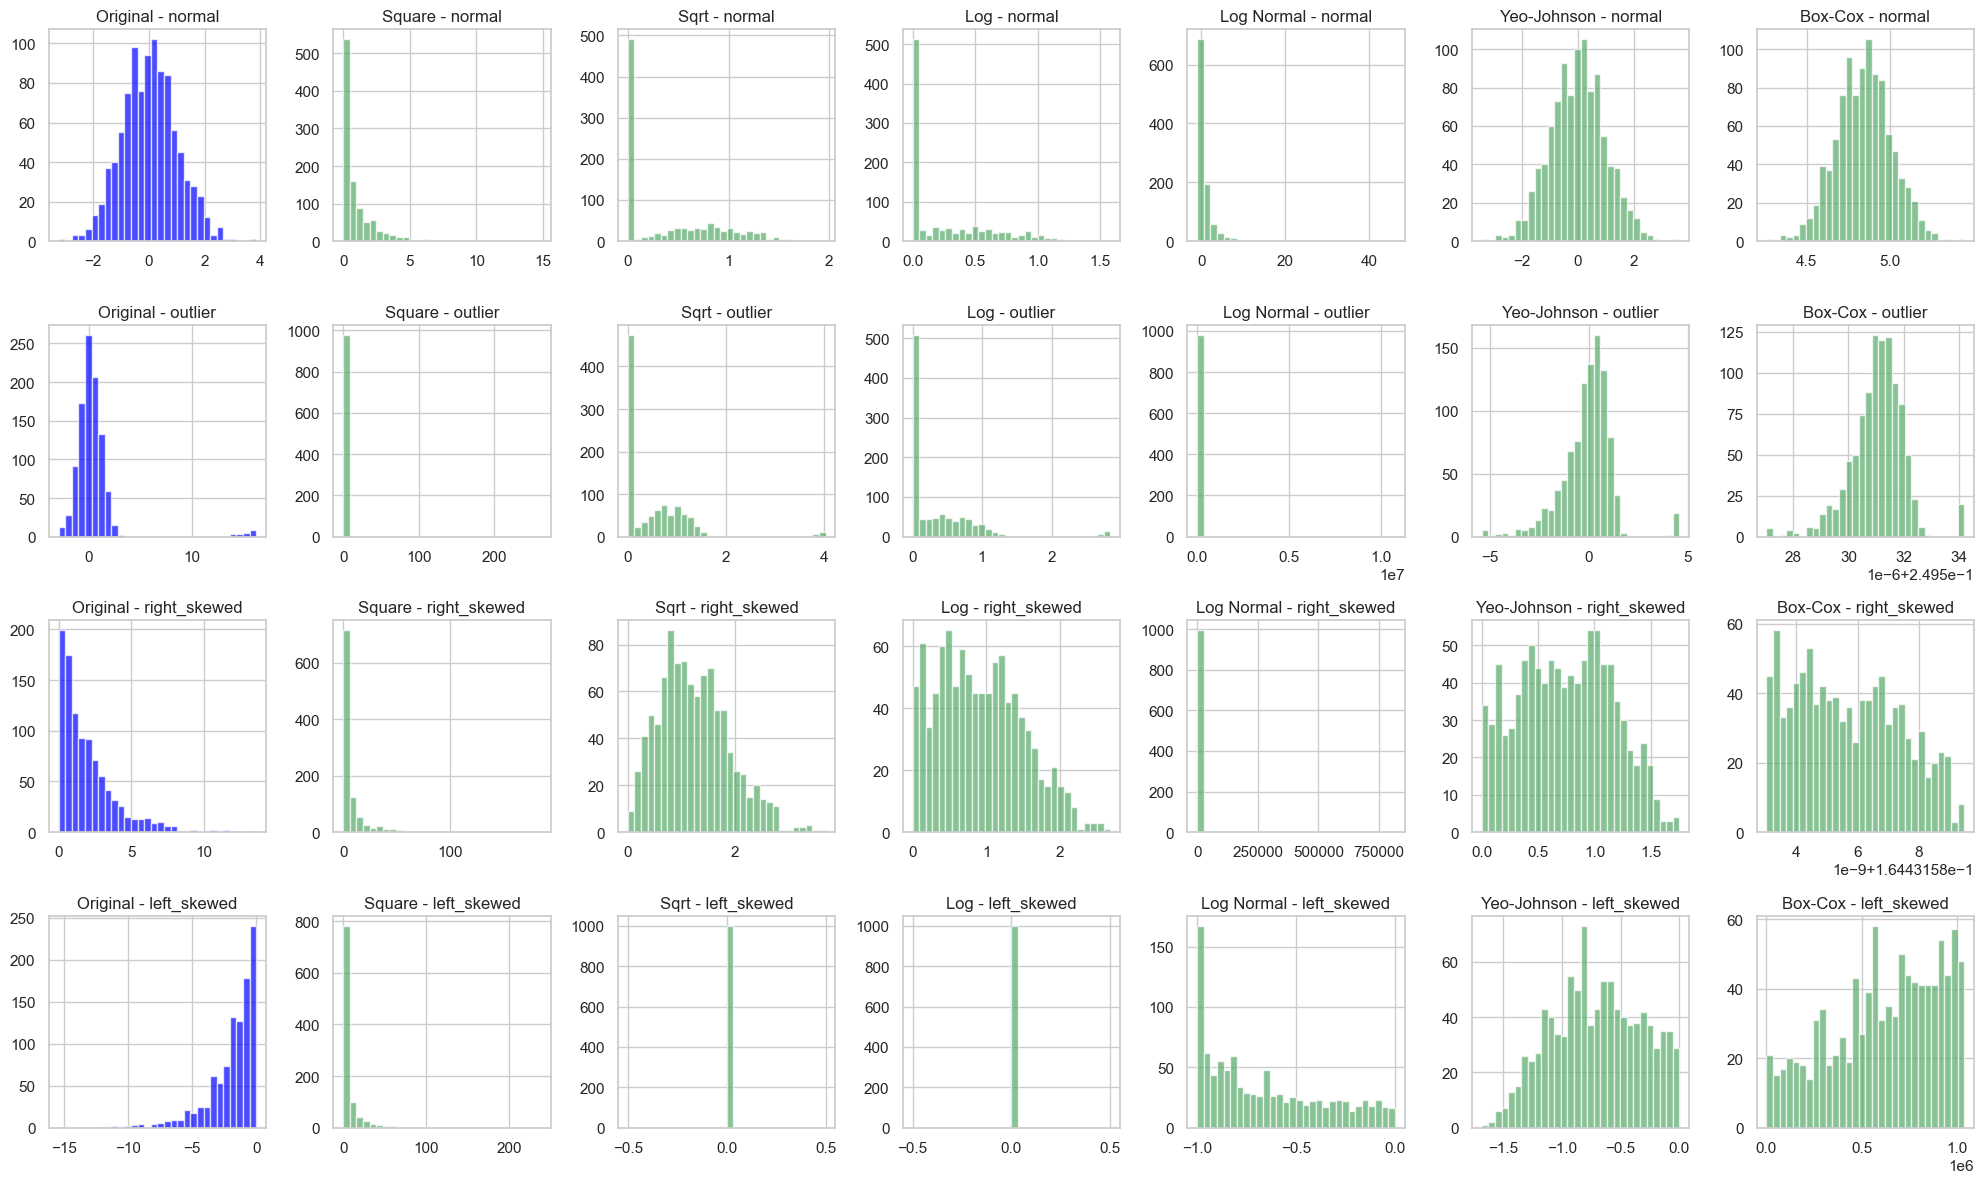

In [43]:
np.random.seed(42)

normal = np.random.normal(loc=0, scale=1, size=1000)
outlier = np.concatenate([np.random.normal(0, 1, 980), np.random.normal(15, 1, 20)])

right_skewed = np.random.exponential(scale=2, size=1000)
left_skewed = -np.random.exponential(scale=2, size=1000)

df = pd.DataFrame({
    'normal': normal,
    'outlier': outlier,
    'right_skewed': right_skewed,
    'left_skewed': left_skewed
})

# Clean NaNs/infs
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Box-Cox safe input
df_boxcox = df + (1 - df.min().min()) + 1e-6

# Transformations
squared_df = df**2
sqrt_df = np.sqrt(df.clip(lower=0))
log_df = np.log1p(df.clip(lower=0))
lognormal_df = np.expm1(df)
yeojohnson_df = pd.DataFrame(PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(df), columns=df.columns)
boxcox_df = pd.DataFrame(PowerTransformer(method='box-cox', standardize=False).fit_transform(df_boxcox), columns=df.columns)

def plot_distribution(transformed_dfs, titles):
    fig, axes = plt.subplots(len(df.columns), len(transformed_dfs) + 1, figsize=(20, 12))
    for i, col in enumerate(df.columns):
        axes[i, 0].hist(df[col], bins=30, color='blue', alpha=0.7)
        axes[i, 0].set_title(f"Original - {col}")
        for j, (t_df, title) in enumerate(zip(transformed_dfs, titles)):
            axes[i, j+1].hist(t_df[col], bins=30, color='g', alpha=0.7)
            axes[i, j+1].set_title(f"{title} - {col}")
    plt.tight_layout()
    plt.show()

plot_distribution(
    [squared_df, sqrt_df, log_df, lognormal_df, yeojohnson_df, boxcox_df],
    ['Square', 'Sqrt', 'Log', 'Log Normal', 'Yeo-Johnson', 'Box-Cox']
)